### Import

In [86]:
pip install PrettyTable

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import math as math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU
from keras.layers import Dropout
from keras.layers import *
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from joblib import parallel_backend

from time import time
from tensorflow.keras.callbacks import TensorBoard
import warnings
warnings.filterwarnings('ignore')

In [8]:
from datetime import datetime

In [89]:
import prettytable

### Load data

In [ ]:
VIX = pd.read_fwf('VIX.txt', names=['Year', 'Clos'])

In [ ]:
VIX.head()

In [3]:
data = pd.read_fwf('SPX.txt', names=['Year', 'Clos'])

In [4]:
data.head()

,Year,Clos
0,06/01/1995,"460,68"
1,13/01/1995,"465,97"
2,20/01/1995,"464,78"
3,27/01/1995,"470,39"
4,03/02/1995,"478,64"


## Data préparation

> Using onlye the Clos column

In [5]:
data['Year'] = pd.to_datetime(data['Year'])
#data['Year']= data['Year'].dt.strftime("%Y-%m-%d")

In [6]:
data['Clos'] = data['Clos'].apply(lambda x: x.replace(',', '.'))
data['Clos']= data['Clos'].astype(float)

In [10]:
interval_data = datetime(2012, 1, 1)

In [11]:
scaler = MinMaxScaler(feature_range=(0,1))

In [42]:
X = np.array(data['Clos'])
X = X.reshape((len(data), 1))

training_data_len = math.ceil(len(X)* 0.75) # training set has 75% of the data
training_data_len


sc = MinMaxScaler(feature_range=(0,1))
training_data = sc.fit_transform(X)
training_data

array([[0.        ],
       [0.00206228],
       [0.00159837],
       ...,
       [0.98682323],
       [0.97501092],
       [0.97122942]])

<H3 style="color: blue"> Train data </H3>

In [44]:
train_data_tmp = data[data['Year']<interval_data]

In [45]:
train = np.array(train_data_tmp['Clos'])

train = train.reshape((len(train_data_tmp), 1))

In [46]:
train_data = scaler.fit_transform(train)

In [47]:
x_train = []
y_train = []
train_data = training_data[0:len(train_data)  , : ]

for x in range(180, len(train_data)):
    x_train.append(train_data[x-180:x, 0])
    y_train.append(train_data[x, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [62]:
y_train.shape

(707,)

<H3 style="color: blue"> Test data </H3>

In [17]:
test_data_tmp = data[data['Year']>interval_data]

In [18]:
test = np.array(test_data_tmp['Clos'])

test = test.reshape((len(test_data_tmp), 1))

In [19]:
test_data = scaler.fit_transform(test)

In [64]:
test_data = training_data[len(train_data) - 180: , : ]

x_test = []
y_test =  X[len(train_data) : , : ]
for i in range(180,len(test_data)):
    x_test.append(test_data[i-180:i,0])

x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
print('Number of rows and columns: ', x_test.shape)


Number of rows and columns:  (405, 180, 1)


In [65]:
y_test.shape

(405, 1)

<H1 style="color: red; text-align:center"> Models </H1>

## LSTM

In [66]:
model = Sequential()

In [67]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

In [68]:
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
#model.add(Dropout(0.3))

model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [71]:
History = model.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
23/23 [==============================] - 31s 520ms/step - loss: 0.0141
Epoch 2/100
23/23 [==============================] - 12s 517ms/step - loss: 0.0026
Epoch 3/100
23/23 [==============================] - 12s 522ms/step - loss: 0.0021
Epoch 4/100
23/23 [==============================] - 12s 526ms/step - loss: 0.0017
Epoch 5/100
23/23 [==============================] - 11s 487ms/step - loss: 0.0014
Epoch 6/100
23/23 [==============================] - 10s 439ms/step - loss: 0.0013
Epoch 7/100
23/23 [==============================] - 12s 519ms/step - loss: 0.0013
Epoch 8/100
23/23 [==============================] - 12s 508ms/step - loss: 0.0013
Epoch 9/100
23/23 [==============================] - 12s 515ms/step - loss: 0.0011
Epoch 10/100
23/23 [==============================] - 12s 538ms/step - loss: 0.0011
Epoch 11/100
23/23 [==============================] - 13s 547ms/step - loss: 0.0011
Epoch 12/100
23/23 [==============================] - 11s 497ms/step - loss: 0.0012
E

23/23 [==============================] - 8s 368ms/step - loss: 3.2334e-04
Epoch 96/100
23/23 [==============================] - 8s 362ms/step - loss: 3.3595e-04
Epoch 97/100
23/23 [==============================] - 8s 335ms/step - loss: 2.8752e-04
Epoch 98/100
23/23 [==============================] - 7s 325ms/step - loss: 3.0949e-04
Epoch 99/100
23/23 [==============================] - 8s 346ms/step - loss: 3.0552e-04
Epoch 100/100
23/23 [==============================] - 7s 309ms/step - loss: 3.2531e-04


***
#### Test

In [97]:
lstm_predicted_stock = model.predict(x_test)
lstm_predicted_stock = scaler.inverse_transform(lstm_predicted_stock)

13/13 [==============================] - 2s 127ms/step


In [98]:
print(r2_score(y_test, lstm_predicted_stock))
print(mean_absolute_error(y_test, lstm_predicted_stock))
print(mean_squared_error(y_test, lstm_predicted_stock))

-3.469186837137708
975.7716299250095
1031984.4089097234


### GRU Model

In [74]:
model_GRU = Sequential()

model_GRU.add(LSTM(units = 200, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model_GRU.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model_GRU.add(GRU(units = 50, return_sequences = True))
model_GRU.add(Dropout(0.2))

model_GRU.add(GRU(units = 50, return_sequences = True))
model_GRU.add(Dropout(0.2))

model_GRU.add(GRU(units = 50, return_sequences=True))
model_GRU.add(Dropout(0.2))

model_GRU.add(GRU(units = 50, return_sequences=True))
model_GRU.add(Dropout(0.2))

model_GRU.add(GRU(units = 50, return_sequences=True))
model_GRU.add(Dropout(0.2))

model_GRU.add(GRU(units = 50))
model_GRU.add(Dropout(0.2))

# Adding the output layer
model_GRU.add(Dense(units = 1))

# Compiling the network
model_GRU.compile(
    optimizer = 'adam', 
    loss = 'mean_squared_error')

# Fitting the network to the Training set
model_GRU.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
23/23 [==============================] - 38s 873ms/step - loss: 0.0187
Epoch 2/100
23/23 [==============================] - 20s 867ms/step - loss: 0.0061
Epoch 3/100
23/23 [==============================] - 20s 873ms/step - loss: 0.0053
Epoch 4/100
23/23 [==============================] - 20s 866ms/step - loss: 0.0049
Epoch 5/100
23/23 [==============================] - 20s 888ms/step - loss: 0.0025
Epoch 6/100
23/23 [==============================] - 23s 1s/step - loss: 0.0023
Epoch 7/100
23/23 [==============================] - 24s 1s/step - loss: 0.0019
Epoch 8/100
23/23 [==============================] - 28s 1s/step - loss: 0.0017
Epoch 9/100
23/23 [==============================] - 33s 1s/step - loss: 0.0016
Epoch 10/100
23/23 [==============================] - 34s 1s/step - loss: 0.0015
Epoch 11/100
23/23 [==============================] - 31s 1s/step - loss: 0.0018
Epoch 12/100
23/23 [==============================] - 28s 1s/step - loss: 0.0015
Epoch 13/100
23/23 [==

23/23 [==============================] - 50s 2s/step - loss: 4.0759e-04
Epoch 99/100
23/23 [==============================] - 38s 2s/step - loss: 5.5028e-04
Epoch 100/100
23/23 [==============================] - 35s 2s/step - loss: 4.9207e-04


In [99]:
gru_predicted_stock = model_GRU.predict(x_test)
gru_predicted_stock = scaler.inverse_transform(gru_predicted_stock)

score = r2_score(y_test, gru_predicted_stock)
score

13/13 [==============================] - 3s 246ms/step


-3.6198855783597166

In [100]:
train = data[:len(train_data)]
valid = data[len(train_data):]
valid['Predictions'] = gru_predicted_stock

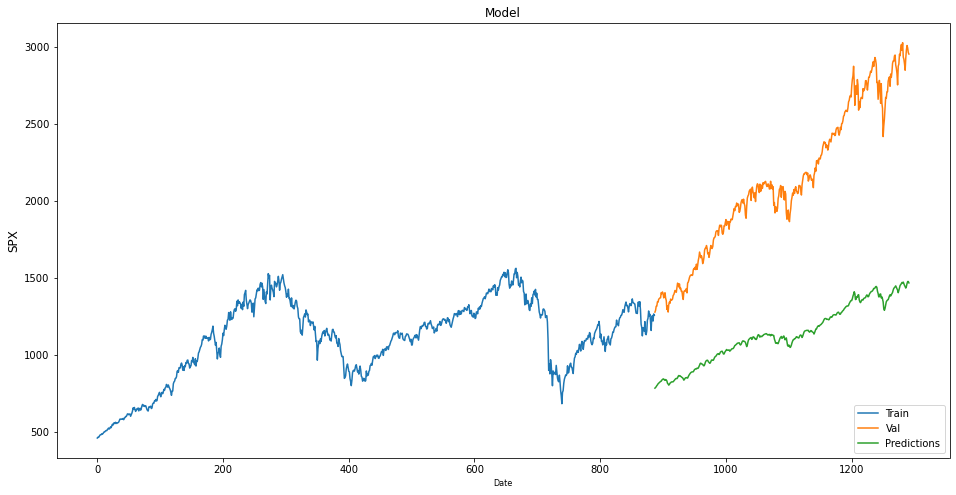

In [79]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=8)
plt.ylabel('SPX', fontsize=12)
plt.plot(train['Clos'])
plt.plot(valid[['Clos', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

## CNN Model

In [80]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

input_shape = (x_train.shape[1], 1)
num_classes = 2

CNN = Sequential()
CNN.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
CNN.add(MaxPooling1D(pool_size=2))
CNN.add(LSTM(units=50, return_sequences=True))
CNN.add(Dropout(0.2))
CNN.add(Flatten())
CNN.add(Dense(1, activation='relu'))

In [82]:
# Compile the model
CNN.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
CNN.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=32)

Epoch 1/100
23/23 [==============================] - 6s 99ms/step - loss: 0.0134 - accuracy: 0.0000e+00 - val_loss: 4742692.5000 - val_accuracy: 0.0000e+00
Epoch 2/100
23/23 [==============================] - 1s 65ms/step - loss: 0.0030 - accuracy: 0.0000e+00 - val_loss: 4742573.0000 - val_accuracy: 0.0000e+00
Epoch 3/100
23/23 [==============================] - 2s 66ms/step - loss: 0.0024 - accuracy: 0.0000e+00 - val_loss: 4742844.0000 - val_accuracy: 0.0000e+00
Epoch 4/100
23/23 [==============================] - 2s 66ms/step - loss: 0.0018 - accuracy: 0.0000e+00 - val_loss: 4742849.5000 - val_accuracy: 0.0000e+00
Epoch 5/100
23/23 [==============================] - 1s 63ms/step - loss: 0.0019 - accuracy: 0.0000e+00 - val_loss: 4742637.5000 - val_accuracy: 0.0000e+00
Epoch 6/100
23/23 [==============================] - 1s 64ms/step - loss: 0.0014 - accuracy: 0.0000e+00 - val_loss: 4742635.0000 - val_accuracy: 0.0000e+00
Epoch 7/100
23/23 [==============================] - 1s 62ms/ste

23/23 [==============================] - 2s 80ms/step - loss: 3.9069e-04 - accuracy: 0.0000e+00 - val_loss: 4742326.5000 - val_accuracy: 0.0000e+00
Epoch 53/100
23/23 [==============================] - 2s 74ms/step - loss: 3.9242e-04 - accuracy: 0.0000e+00 - val_loss: 4742396.0000 - val_accuracy: 0.0000e+00
Epoch 54/100
23/23 [==============================] - 2s 85ms/step - loss: 3.7880e-04 - accuracy: 0.0000e+00 - val_loss: 4742174.5000 - val_accuracy: 0.0000e+00
Epoch 55/100
23/23 [==============================] - 2s 89ms/step - loss: 4.3709e-04 - accuracy: 0.0000e+00 - val_loss: 4742266.0000 - val_accuracy: 0.0000e+00
Epoch 56/100
23/23 [==============================] - 2s 76ms/step - loss: 3.6392e-04 - accuracy: 0.0000e+00 - val_loss: 4742331.0000 - val_accuracy: 0.0000e+00
Epoch 57/100
23/23 [==============================] - 1s 62ms/step - loss: 3.8511e-04 - accuracy: 0.0000e+00 - val_loss: 4742346.5000 - val_accuracy: 0.0000e+00
Epoch 58/100
23/23 [===========================

In [101]:
cnn_predicted_stock = CNN.predict(x_test)
cnn_predicted_stock = sc.inverse_transform(cnn_predicted_stock)
train = data[:len(train_data)]
valid = data[len(train_data):]
valid['Predictions'] = cnn_predicted_stock
score = r2_score(y_test, cnn_predicted_stock)
score

13/13 [==============================] - 0s 21ms/step


0.7672737260108393

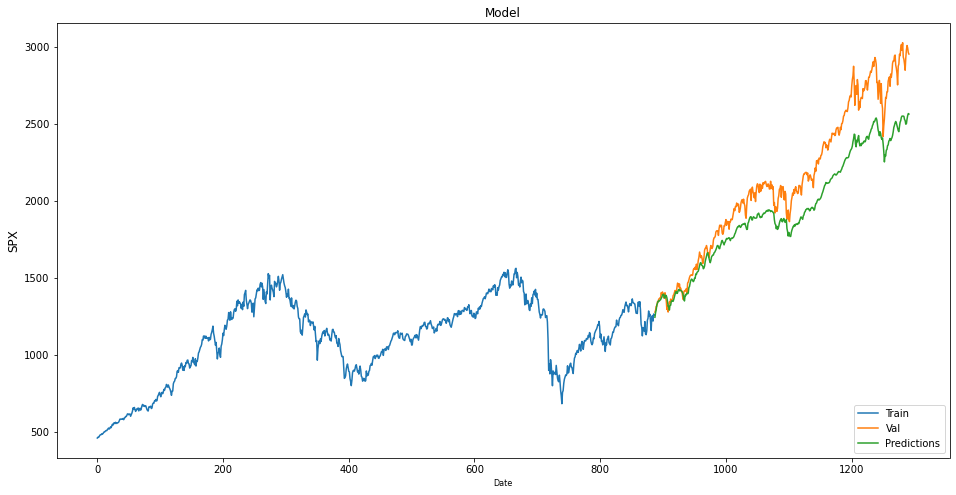

In [102]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=8)
plt.ylabel('SPX', fontsize=12)
plt.plot(train['Clos'])
plt.plot(valid[['Clos', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [108]:
myTable = PrettyTable(["", "Accuracy", "MSE", "MAE"])

myTable.add_row(["LSTM", 
           str(round(r2_score(y_test, lstm_predicted_stock),2)), 
           str(round(mean_squared_error(y_test, cnn_predicted_stock),2)), 
           str(round(mean_absolute_error(y_test, cnn_predicted_stock),2)),
          ]
         )
myTable.add_row(["GRU", 
           str(round(r2_score(y_test, gru_predicted_stock),2)), 
           str(round(mean_squared_error(y_test, gru_predicted_stock),2)), 
           str(round(mean_absolute_error(y_test, gru_predicted_stock),2)),
          ]
         )
           
myTable.add_row(["CNN", 
           str(round(r2_score(y_test, cnn_predicted_stock),2)), 
           str(round(mean_squared_error(y_test, cnn_predicted_stock),2)), 
           str(round(mean_absolute_error(y_test, cnn_predicted_stock),2)),
          ]
         )
print(myTable)

+------+----------+------------+--------+
|      | Accuracy |    MSE     |  MAE   |
+------+----------+------------+--------+
| LSTM |  -3.47   |  53739.06  | 193.87 |
| GRU  |  -3.62   | 1066782.41 | 991.13 |
| CNN  |   0.77   |  53739.06  | 193.87 |
+------+----------+------------+--------+
